# 1. Importing libraries

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2. Importing data

In [2]:
#Define path
path = r'C:\Users\astat\Documents\Instacart Basket Analysis'

In [3]:
orders_products_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

# 3. Key Questions

In [4]:
#df overview
orders_products_all.shape

(32404859, 35)

In [5]:
orders_products_all.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'family_status', 'income', 'order_id',
       'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_last_order', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'prices', 'price_range',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'mean_spending', 'spending_flag', 'order_frequency',
       'frequency_flag', '_merge', 'region', 'activity_flag', 'profile',
       'spending'],
      dtype='object')

# 3.1 Spending & time of day

In [6]:
ct_spending_hour = pd.crosstab(orders_products_all['spending'], orders_products_all['order_hour_of_day'], dropna=False)

In [7]:
ct_spending_hour

order_hour_of_day   0   1   2   3   4   5   6   7    8    9   ...   14   15  \
spending                                                      ...             
3.000000             0   0   0   0   0   0   0   0    0    0  ...    1    0   
3.300000             0   0   0   0   0   0   0   0    0    0  ...    1    0   
3.600000             0   0   0   0   0   0   0   0    0    0  ...    0    0   
3.900000             0   0   0   0   0   0   0   0    1    0  ...    0    3   
4.000000             0   0   0   0   0   0   0   0    0    0  ...    0    1   
...                ...  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...   
22595.500000         0   0   0   0   0   0   0   0    0   32  ...  115  721   
22696.900391         0   0   0   0   0   0   0   0   24  108  ...  369  215   
22777.900391         0   0   0   0   0   0   0  54  184  206  ...  307  261   
24307.099609         0   0   0   0   0   0   0   0   74  159  ...  128  373   
26394.900391       178  97   0   0   0   0   0  84  257  161  ...  192  225   

order_hour_of_day   16   17   18   19   20  21   22   23  
spending                                                  
3.000000             1    0    2    0    0   0    1    0  
3.300000             1    2    2    2    0   0    0    1  
3.600000             0    0    0    0    0   0    0    0  
3.900000             0    1    0    1    0   0    0    1  
4.000000             0    2    0    0    0   0    0    0  
...                ...  ...  ...  ...  ...  ..  ...  ...  
22595.500000       635  187  205   31    3   0    0    0  
22696.900391       224  445  195   30   36   0    0    0  
22777.900391       334  241   40  116  158   0   22   36  
24307.099609       260  134    0  112   70   0   42  137  
26394.900391       227  452  203   19  113   0  125  175  

[46610 rows x 24 columns]

In [8]:
#Order value
orders_products_all['order_value'] = orders_products_all.groupby(['order_id'])['prices'].transform(np.sum)

In [9]:
#Creating a sample
#Set seed for random number generator
np.random.seed(4)
#Create list holding boolean values to the test np.random.rand() <= 0.7
dev = np.random.rand(len(orders_products_all)) <= 0.7

In [10]:
#Splitting df
#Store 30% of smaple in df small
small = orders_products_all[~dev]

In [11]:
#Reducing sample to necessary columns
df_2 = small[['order_hour_of_day','spending']]

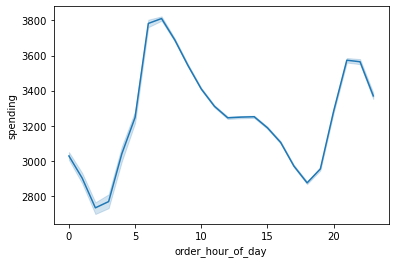

In [12]:
#Create line chart - spending through course of day
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'spending')

In [13]:
#Exporting charts
line.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_spending_day.png'))

In [14]:
df_3 = small[['order_hour_of_day','order_value']]

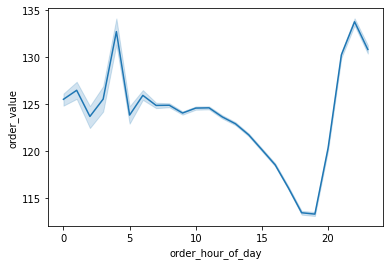

In [15]:
#Create line chart - spending through course of day
Order_value_day_line = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'order_value')

In [16]:
#Exporting chart
Order_value_day_line.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_order_value_day.png'))

# 3.3 Price range and department

In [44]:
ct_dep_price = pd.crosstab(orders_products_all['department_id'], orders_products_all['price_range'], dropna=False)

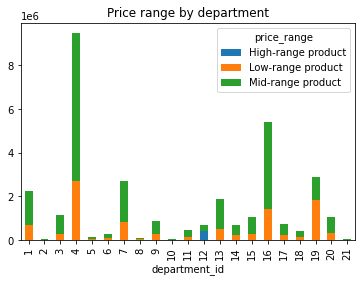

In [45]:
dep__price_bar = ct_dep_price.plot(kind='bar', stacked=True,
        title='Price range by department')

In [46]:
#Exporting charts
dep__price_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_dep_price.png'))

# 3.4 Department frequency

In [17]:
#deparment & order_frequency
#aggregating average orders per department
orders_products_all.groupby('department_id').agg({'order_frequency': ['mean', 'min', 'max']})

order_frequency           
                         mean  min   max
department_id                           
1                   11.046875  0.0  30.0
2                   10.382812  0.0  30.0
3                   10.343750  0.0  30.0
4                   10.132812  0.0  30.0
5                   10.093750  0.0  30.0
6                   10.703125  0.0  30.0
7                   10.375000  0.0  30.0
8                   11.093750  0.0  30.0
9                   11.015625  0.0  30.0
10                   9.398438  0.0  30.0
11                  11.007812  0.0  30.0
12                  10.726562  0.0  30.0
13                  10.656250  0.0  30.0
14                  10.523438  0.0  30.0
15                  11.015625  0.0  30.0
16                  10.156250  0.0  30.0
17                  11.367188  0.0  30.0
18                   9.093750  0.0  30.0
19                  10.351562  0.0  30.0
20                  10.609375  0.0  30.0
21                   9.445312  0.0  30.0

# 3.6 Regional Differences

---region & department---

In [18]:
ct_region_dep = pd.crosstab(orders_products_all['department_id'], orders_products_all['region'], dropna = False)

In [19]:
ct_region_dep

region         Midwest  Northeast    South     West
department_id                                      
1               524096     345032   793786   571829
2                 8420       5749    13048     9074
3               273869     183764   413650   301145
4              2227937    1474885  3351505  2424964
5                36186      23327    54839    39344
6                63736      41178    94855    69484
7               625574     425306   957052   680191
8                22355      16551    33319    25491
9               203769     134121   305139   223598
10                8193       5136    12199     9045
11              105749      69429   159736   112658
12              166129     110354   250018   182426
13              442101     291236   660645   481387
14              163551     108522   249303   181657
15              250702     165406   377364   274586
16             1264223     843526  1907469  1383529
17              175824     115321   259234   188287
18               98983      66756   152037   106026
19              673715     454245  1017776   741814
20              245678     164937   371299   269335
21               16535      10873    24694    17043

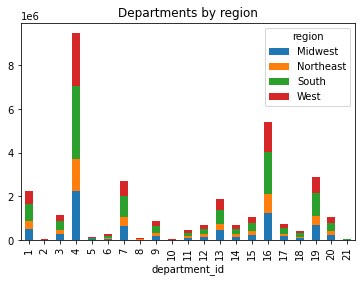

In [20]:
reg_dep_bar = ct_region_dep.plot(kind='bar', stacked=True,
        title='Departments by region', legend = 'bottom')

In [21]:
#Exporting charts
reg_dep_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_dep_region.png'))

---region and spending habits---

In [22]:
ct_region_spending = pd.crosstab(orders_products_all['region'], orders_products_all['spending_flag'], dropna = False)

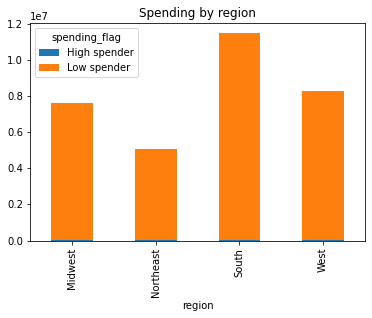

In [23]:
reg_spend_bar = ct_region_spending.plot(kind='bar', stacked=True,
        title='Spending by region')

In [40]:
ct_region_spending.to_clipboard()

---region and frquency---

In [24]:
ct_region_freq = pd.crosstab(orders_products_all['region'], orders_products_all['order_frequency'], dropna = False)

In [43]:
ct_region_freq

order_frequency   0.0   0.5    1.0   1.5     2.0   2.5     3.0   3.5     4.0   \
region                                                                          
Midwest           7186    63  30044    70  122981   880  351820  3383  528418   
Northeast         5752    25  27881   111   95002   315  220088  2454  362622   
South            12746   103  51655  1243  196204  3785  539469  3147  812112   
West              8556    44  42538   260  146977  2269  368610  3484  611137   

order_frequency   4.5   ...  25.5   26.0  26.5   27.0  27.5   28.0  28.5  \
region                  ...                                                
Midwest           7206  ...  2565  35767  1828  43276  1709  47688  1495   
Northeast         5249  ...   931  26121   482  25966   557  32663  1069   
South            11411  ...  2407  59514  1818  60391  2302  68666  2237   
West              5630  ...  2007  40549  1386  43587  1031  50887  1750   

order_frequency   29.0  29.5    30.0  
region                                
Midwest          31581  1042  395811  
Northeast        22504   745  263090  
South            49233  1832  594372  
West             33601  1476  430577  

[4 rows x 61 columns]

In [26]:
COLORS= {'West':'blue','South':'orange','Northeast':'green','Midwest':'yellow'}

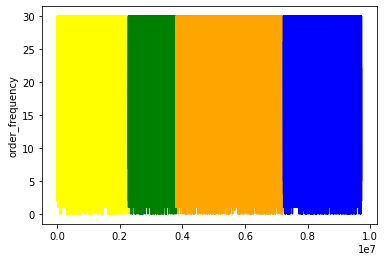

In [37]:
gk = small.groupby("region")
x = np.arange(len(small))
index = 0
for region_name, region_group in gk:
    sns.lineplot(
        x=x[index : index + len(region_group)],
        y=region_group.order_frequency,
        color=COLORS.get(region_name),
    )
    index += len(region_group)
plt.show()

---region and prices ---

In [41]:
ct_region_price = pd.crosstab(orders_products_all['region'], orders_products_all['price_range'], dropna = False)

In [42]:
ct_region_price.to_clipboard()

# 3.7 Loyalty and spending

In [47]:
ct_loyalty_spending = pd.crosstab(orders_products_all['loyalty_flag'], orders_products_all['spending_flag'], dropna=False)

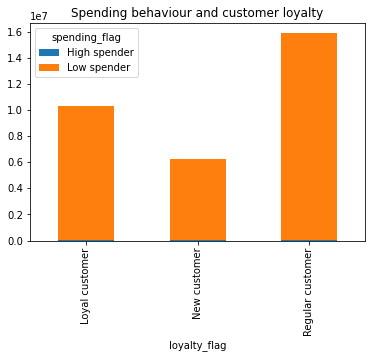

In [36]:
loyal_spend_bar = ct_loyalty_spending.plot(kind='bar', stacked=True, title="Spending behaviour and customer loyalty")

In [39]:
ct_loyalty_spending.to_clipboard()